In [141]:
%%shell
jupyter nbconvert --to html /content/week7_JOUHRI.ipynb

[NbConvertApp] Converting notebook /content/week7_JOUHRI.ipynb to html
[NbConvertApp] Writing 847880 bytes to /content/week7_JOUHRI.html


# IMPORT PACKAGES 




---



In [112]:
import tensorflow as tf
from tensorflow.python.client import device_lib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.utils import shuffle 

from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam

# IMPORT DATASET

---


In [58]:
df = pd.read_csv('/content/phpbL6t4U_train_5.csv',sep=',', header=None) 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,179144.4570,4.324045,40.516544,51.634308,65.203051,-30.969907,-44.033906,-174.491862,164454.6680,3.882896,38.193624,50.593395,64.576726,-28.289566,-42.136749,-148.983107,16243.5205,4.020542,3.309528,3.946593,4.855002,-3.349493,-4.611774,-6.795919,15801.4273,3.853523,3.233820,3.910551,4.795017,-3.240915,-4.428269,-6.931324,4666.1817,2.525254,1.140943,1.961961,2.572754,-0.974341,-1.481629,-2.518789,...,4.368105,3.235803,3.737954,4.894223,-3.365840,-4.634943,-7.996208,5437.4089,2.622619,1.296986,2.258166,3.233892,-1.139014,-1.852633,-3.351495,5522.1103,2.570800,1.287693,2.084571,3.037389,-1.101312,-1.660891,-3.140653,30326.7119,5.139005,6.365165,7.335163,9.685423,-7.117522,-10.898430,-15.741278,26881.2070,4.928792,5.681980,6.624440,8.711814,-6.203910,-9.321389,-14.550464,5
1,3551.3980,1.530871,0.757021,1.267338,5.414229,-0.632435,-1.213931,-6.121886,4887.3594,1.981132,1.064142,1.664353,5.441200,-0.838391,-1.452721,-6.519985,5838.6091,3.299078,1.796338,2.967018,5.776041,-1.121862,-2.058144,-7.825954,6039.0959,3.269267,1.844554,3.015526,6.303305,-1.167539,-2.013042,-7.902943,1410.1576,1.746235,0.509892,1.144309,4.082424,-0.327488,-0.791662,-4.503503,...,3.078897,1.477404,2.390655,4.967670,-0.900076,-1.400734,-4.871809,1422.5294,1.840766,0.507258,1.044360,2.946059,-0.307279,-0.677228,-2.934100,1579.9120,1.934030,0.552464,1.112372,2.906538,-0.324045,-0.647566,-2.969471,6385.8269,2.962314,2.271397,3.933800,7.024654,-1.300688,-2.098595,-6.111139,5168.6492,2.837014,1.824642,3.194264,5.594762,-1.056513,-1.686037,-4.216801,2
2,13866.9517,3.895930,3.958746,5.823928,9.934951,-9.587939,-31.944573,-62.416398,14086.8765,4.174060,4.209044,6.440190,10.300353,-2.350805,-3.521050,-13.526813,32864.1923,7.320470,16.373584,42.296047,53.826575,-8.003590,-12.626281,-29.640737,34075.7197,7.127918,16.859009,42.346687,55.210480,-8.184571,-12.855560,-29.487123,2527.1519,2.402773,1.183728,3.365387,5.930179,-0.574918,-1.145494,-4.101330,...,6.823996,13.719158,34.095613,41.223498,-6.761989,-10.044721,-18.658435,5631.4351,3.302243,2.805149,7.823318,10.715035,-1.353338,-2.324006,-4.256837,6203.9458,3.532380,3.038355,8.380443,11.140545,-1.470370,-2.463510,-4.951254,34293.4643,6.369210,19.497858,57.331113,70.144523,-8.387989,-13.915053,-25.735901,29489.9131,6.182871,16.087730,46.329411,57.903797,-7.236459,-11.751407,-21.653794,2
3,69921.2724,10.431633,22.126565,35.998285,44.927278,-13.118918,-17.983289,-48.414144,73414.6245,10.270922,23.582394,39.141325,49.983891,-13.589021,-19.099311,-51.018411,11510.0645,4.414969,3.416163,5.644245,9.420051,-2.307526,-3.798418,-11.421808,11961.8222,4.306264,3.461130,5.702041,9.348255,-2.327024,-3.733069,-12.329786,2598.8803,2.622630,0.892069,2.196057,4.846749,-0.545195,-1.040575,-4.590241,...,4.785890,4.018383,5.868421,8.025432,-3.022745,-4.496689,-10.126872,4602.2224,3.128923,1.662119,3.924349,6.196186,-0.904196,-1.483612,-3.981289,4465.1155,3.125797,1.606254,3.622195,5.589251,-0.858083,-1.379022,-3.511990,21585.2056,5.010402,6.601381,10.955242,14.250467,-4.485755,-7.275999,-16.016113,21014.9747,5.125162,6.150406,9.897148,12.453827,-4.342949,-7.023092,-13.740451,6
4,19588.2769,5.535364,4.404846,6.002946,8.269064,-2.871382,-4.319357,-12.488787,25868.1431,7.718992,6.380998,9.237439,13.480226,-4.535998,-6.319519,-19.829757,2800.6374,2.083524,1.131220,2.351444,5.563951,-1.150594,-2.091643,-5.534062,2856.5303,2.041720,1.115351,2.398002,5.027541,-1.185780,-1.903775,-6.011941,1959.0239,2.392831,0.775526,1.974276,3.748335,-0.578811,-1.180180,-4.291765,...,2.008225,1.059539,2.283076,4.987805,-1.130067,-2.066030,-7.762962,2130.4342,2.630013,0.850258,2.145638,4.951537,-0.636613,-1.348376,-6.204271,2031.0659,2.605163,0.812680,2.042067,5.096901,-0.556135,-1.301828,-5.106164,4391.

Since the values are very not very close between themselves we can scale our dataset. But maybe scale our dataset will reduce concentrations 


In [59]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
count,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,...,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000,11128.000000
mean,50588.007655,6.577531,12.976750,18.809778,26.873855,-9.187844,-14.436640,-60.291798,57353.489338,6.675081,15.537326,23.481706,33.842015,-10.355369,-16.477167,-73.335268,16266.729510,5.811123,5.353571,10.184559,14.550594,-3.660029,-5.726912,-13.332348,16417.144367,5.648520,5.433991,10.465356,15.900135,-3.656594,-5.773995,-13.807787,3595.894010,3.029010,1.331509,3.297630,5.619014,-0.845342,-1.517022,-4.367271,...,5.770833,4.791693,8.655681,11.643852,-3.384428,-5.078780,-10.995606,4843.505015,3.385769,1.821539,4.734062,7.483944,-1.117518,-1.944108,-4.656520,4938.183155,3.430692,1.791195,4.505398,7.070422,-1.104242,-1.849868,-4.444456,22427.282829,6.289313,8.208000,17.330653,22.185775,-5.693979,-9.665602,-19.258022,19745.912099,6.115638,7.165200,14.987176,19.158042,-4.925857,-8.222037,-16.184329,3.376797
std,69399.496233,7.434113,17.553395,24.848296,37.004595,12.647461,21.209204,131.152284,63814.817646,16.993442,16.529556,24.478768,42.704285,11.055670,21.136322,159.104298,11409.241930,4.418460,4.106307,9.833487,43.911365,2.934641,4.827470,12.025071,11200.206639,4.244636,4.391827,12.349942,119.385554,2.901345,6.872026,37.920726,2306.192544,1.498368,0.814378,2.240822,3.947308,0.603836,1.602774,9.444870,...,4.384626,3.534642,7.212780,8.128586,2.697408,4.205381,12.256592,2723.425138,1.631113,1.012906,3.024717,4.843443,0.704202,1.273321,5.063022,2760.088902,1.700507,0.980649,2.876454,4.665640,0.688378,1.192877,4.668453,16577.191366,4.935032,6.185989,14.815857,17.694725,5.019060,9.292400,26.857601,14265.954884,4.664536,5.248184,12.232645,14.342031,4.213358,7.701537,21.243745,1.728313
min,-12826.543000,0.176524,0.000100,0.000100,0.000100,-127.407470,-202.753097,-1661.396747,-4839.446300,0.185164,0.002252,0.020647,0.000100,-87.909218,-249.508514,-1922.637410,-1198.200200,0.226896,0.001738,0.007875,0.103424,-18.618364,-85.109074,-355.474930,-1858.290000,0.209933,0.000100,0.000100,0.000100,-42.152371,-406.576259,-2946.481557,-48.176300,0.974547,0.003074,0.040015,0.227690,-12.562238,-131.697907,-880.098640,...,0.844499,0.003351,0.033390,0.000100,-18.050700,-38.455448,-377.707777,-57.604300,0.985504,0.005965,0.058550,0.312217,-4.177817,-40.578894,-404.909860,-63.149200,0.984330,0.001948,0.054492,0.380956,-3.804284,-39.845058,-397.184324,-297.240500,0.913897,0.000219,0.000100,0.000100,-36.163600,-76.069200,-482.278033,-198.476500,0.936072,0.003238,0.011488,0.118849,-30.205911,-58.725723,-410.152297,1.000000
25%,6715.344550,2.283548,1.644265,2.397318,4.962055,-11.695028,-17.326697,-48.596247,13226.050075,2.776462,3.693819,5.855816,9.310009,-13.528417,-19.569165,-57.835234,7511.190000,2.818164,2.261225,3.691638,6.935954,-5.193789,-7.894319,-16.184452,7

In [60]:
df.iloc[:,-1].unique()

array([5, 2, 6, 1, 4, 3])

Here we can see our 6 classed  each numbers correpond to 1 gaz

1.   Ethanol
2.   Ethylene
3.   Ammonia
4.  Acetaldehyde 
5.  Acetone
6. Toluene


In [61]:
df = shuffle(df)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y = to_categorical(y)

We  suffle the dataset with the shuffle() function
We put the values in X and labels in y 
to_catgeorical converts a class vector (integers) to binary class matrix.





In [62]:
rate_train = 0.85       # 85 % of our data will be our train data
total_X = X.shape[0]   # Number of rows
n_train = int(rate_train * total_X)     # Number of rows for the train dataset (85% of the 4365 initial rows)

X_train, X_test = X[:n_train,:], X[n_train:,:]      # We define the train and test dataset 
y_train, y_test = y[:n_train], y[n_train:]          # as well as our validation set

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9458, 128) (9458, 7)
(1670, 128) (1670, 7)


# MODEL CREATION 

Here we create an intuitive model, to get an idea of the accuracy we can have with something "simple"

In [63]:
#First lets compute an early stopping to avoid overfitting. 
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
callbacks=[early_stopping]

In [64]:
model1 = Sequential()
model1.add(Dense(40, activation='relu', input_shape=(X.shape[1],)))
model1.add(Dense(40, activation='relu'))
model1.add(Dense(y.shape[1], activation='softmax'))

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
hist1 = model1.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_test, y_test), verbose=1,callbacks=[early_stopping])

acc1 = hist1.history['val_acc']
val_loss1 = hist1.history['val_loss']

Epoch 1/100
19/19 [==============================] - 1s 16ms/step - loss: 5393.7266 - acc: 0.1786 - val_loss: 278.9280 - val_acc: 0.5108
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 231.0221 - acc: 0.5731 - val_loss: 137.8430 - val_acc: 0.6443
Epoch 3/100
19/19 [==============================] - 0s 21ms/step - loss: 128.7456 - acc: 0.6669 - val_loss: 194.5827 - val_acc: 0.6934
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 111.8678 - acc: 0.7294 - val_loss: 51.3380 - val_acc: 0.7581
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 78.3077 - acc: 0.7127 - val_loss: 45.2280 - val_acc: 0.8311
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 65.9235 - acc: 0.7811 - val_loss: 46.0813 - val_acc: 0.8473
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 64.9271 - acc: 0.7963 - val_loss: 52.6341 - val_acc: 0.7916
Epoch 8/100
19/19 [==============================] - 0s 6ms

Here we compute a model with 100 epochs, but our early stopping stopped it  at 61 epoch. So we can have a better accuracy but our model will overfit

In [65]:
small_model = Sequential()
small_model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
small_model.add(Dense(10, activation='relu'))
small_model.add(Dense(y.shape[1], activation='softmax'))

small_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
small_hist = small_model.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_test, y_test), verbose=1)

small_acc = small_hist.history['val_acc']
small_val_loss = small_hist.history['val_loss']

Epoch 1/100
19/19 [==============================] - 1s 15ms/step - loss: 8973.0835 - acc: 0.0593 - val_loss: 3126.6023 - val_acc: 0.1126
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 2377.7789 - acc: 0.1954 - val_loss: 1170.5417 - val_acc: 0.3126
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 907.8437 - acc: 0.3485 - val_loss: 469.1337 - val_acc: 0.3820
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 444.2712 - acc: 0.4238 - val_loss: 241.0490 - val_acc: 0.5677
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 272.8679 - acc: 0.5344 - val_loss: 207.1940 - val_acc: 0.5545
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 210.8011 - acc: 0.5889 - val_loss: 142.1254 - val_acc: 0.6228
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 180.5661 - acc: 0.6248 - val_loss: 134.8393 - val_acc: 0.6162
Epoch 8/100
19/19 [==============================]

In [66]:
#Dropout

dpt_model = Sequential()
dpt_model.add(Dense(40, activation='relu', input_shape=(X.shape[1], ),kernel_initializer='he_uniform'))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(40, activation='relu'))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(y.shape[1], activation='softmax'))

dpt_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
dpt_hist = dpt_model.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_test, y_test), verbose=1)

dpt_acc = dpt_hist.history['val_acc']
dpt_val_loss = dpt_hist.history['val_loss']

Epoch 1/100
19/19 [==============================] - 1s 16ms/step - loss: 20147.6117 - acc: 0.1537 - val_loss: 1916.3096 - val_acc: 0.2838
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 7233.8774 - acc: 0.2158 - val_loss: 1026.4659 - val_acc: 0.3108
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 3338.6661 - acc: 0.2410 - val_loss: 484.0756 - val_acc: 0.4868
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 1313.6524 - acc: 0.2601 - val_loss: 187.6041 - val_acc: 0.4527
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 473.4488 - acc: 0.3117 - val_loss: 49.9819 - val_acc: 0.3671
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 178.8591 - acc: 0.3018 - val_loss: 25.3504 - val_acc: 0.2982
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 53.3333 - acc: 0.2579 - val_loss: 6.5666 - val_acc: 0.3120
Epoch 8/100
19/19 [==============================] -

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time. But here it leads to an underfitting



*   Model 4 uses a kernel initializer. Initializers define the way to set the initial random weights of Keras layers.
*   In addition we compute this model with a kernel_regularizer regularizers allow you to apply penalties on layer parameters or layer activity during optimization



In [67]:
model4 = Sequential([Dense(50, input_shape=(X.shape[1],), activation='relu',kernel_initializer='he_uniform', kernel_regularizer=l2(0.005)),
                    Dense(y.shape[1], activation='softmax')])
  
model4.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

hist4 = model4.fit(X_train, y_train, batch_size=512, epochs=200, validation_data=(X_test, y_test), verbose=1,callbacks=[early_stopping])

acc4 = hist4.history['val_accuracy']
loss4 = hist4.history['val_loss']

Epoch 1/200
19/19 [==============================] - 1s 15ms/step - loss: 10746.1837 - accuracy: 0.1395 - val_loss: 1787.9199 - val_accuracy: 0.3299
Epoch 2/200
19/19 [==============================] - 0s 6ms/step - loss: 1613.1764 - accuracy: 0.3934 - val_loss: 687.0752 - val_accuracy: 0.5707
Epoch 3/200
19/19 [==============================] - 0s 6ms/step - loss: 719.0419 - accuracy: 0.5770 - val_loss: 501.0140 - val_accuracy: 0.6018
Epoch 4/200
19/19 [==============================] - 0s 6ms/step - loss: 514.1129 - accuracy: 0.6470 - val_loss: 741.9632 - val_accuracy: 0.6234
Epoch 5/200
19/19 [==============================] - 0s 6ms/step - loss: 628.3469 - accuracy: 0.6471 - val_loss: 318.7065 - val_accuracy: 0.7000
Epoch 6/200
19/19 [==============================] - 0s 5ms/step - loss: 393.7932 - accuracy: 0.6927 - val_loss: 295.5767 - val_accuracy: 0.6922
Epoch 7/200
19/19 [==============================] - 0s 6ms/step - loss: 324.5904 - accuracy: 0.7304 - val_loss: 294.7681 - v

Here we have a val_accuracy 

# VISUALISATION 📈

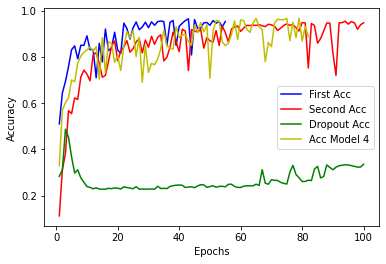

In [91]:
n1 = range(1, 56)
n2=range(1, 101)
n3=range(1, 101)
n4=range(1, 83)
plt.plot(epochs1, acc1, 'b', label='First Acc')
plt.plot(n2, small_acc, 'r', label='Second Acc')
plt.plot(n3, dpt_acc, 'g', label='Dropout Acc')
plt.plot(n4, acc4, 'y', label='Acc Model 4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

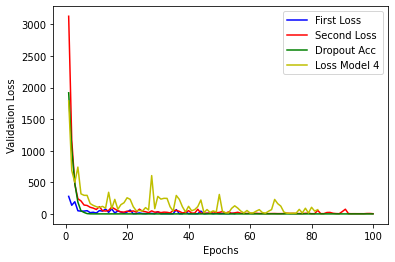

In [92]:
epochs = range(1, 101)
plt.plot(n1, val_loss1, 'b', label='First Loss')
plt.plot(n2, small_val_loss, 'r', label='Second Loss')
plt.plot(n3, dpt_val_loss, 'g', label='Dropout Acc')
plt.plot(n4, loss4, 'y', label='Loss Model 4')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

Our first model seems to be the best one with a val accuracy of 95%. 
So in the next part we will try to optimise this model

# OPTIMISATION OF OUR BEST MODEL (model 1)

In [111]:
#### Lrate and decay

First we will try to find the best learning rate for the model. 

In [113]:
def fit_model_acc(trainX, trainy, testX, testy, lrate):
  
 
  
  
  

  
  model = Sequential()
  model.add(Dense(40, activation='relu', input_shape=(X.shape[1],)))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(y.shape[1], activation='softmax'))

  
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
              metrics=['accuracy'])
  history = model.fit( trainX, trainy, validation_data =( testX , testy ),
                      epochs =100, verbose =0)
 
  print("Learning rate : ",lrate)
  
  print("Accuracy : ", history.history['accuracy'][-1])
  print("Val Accuracy : ", history.history['val_accuracy'][-1])
  print("Loss : ", history.history['loss'][-1])
  print("Val Loss : ", history.history['val_loss'][-1],"\n")
  
  plt.figure(0)
  plt.plot(history.history['accuracy'], label='train', color='r')
  plt.plot(history.history['val_accuracy'], label='test', color='b')
  plt.title('lrate='+str(lrate), pad=-50)
  plt.xlabel("Epochs")
  plt.ylabel("accuracy")
  plt.legend()

  plt.figure(1)

  plt.plot(history.history['loss'], label='train', color='g')
  plt.plot(history.history['val_loss'], label='test', color='y')
  plt.title('lrate='+str(lrate), pad=-50)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()


I put a list of different learning rates in order to see which one gives the best results

Learning rate :  1e-06
Accuracy :  0.5393317937850952
Val Accuracy :  0.542514979839325
Loss :  330.405029296875
Val Loss :  282.1396179199219 



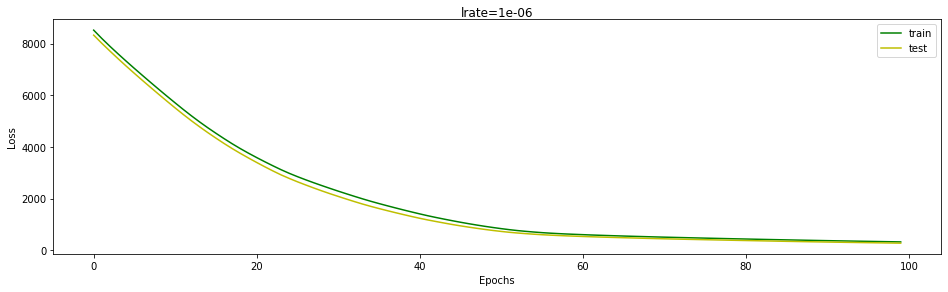

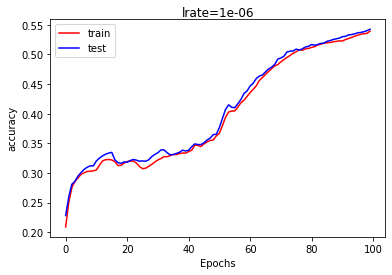

Learning rate :  1e-05
Accuracy :  0.9330725073814392
Val Accuracy :  0.9179641008377075
Loss :  7.5840864181518555
Val Loss :  6.953628063201904 



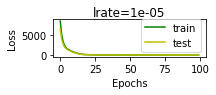

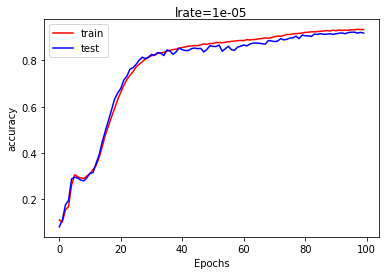

Learning rate :  0.0001
Accuracy :  0.9832945466041565
Val Accuracy :  0.9814371466636658
Loss :  2.2150845527648926
Val Loss :  3.4522974491119385 



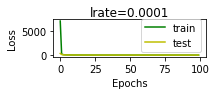

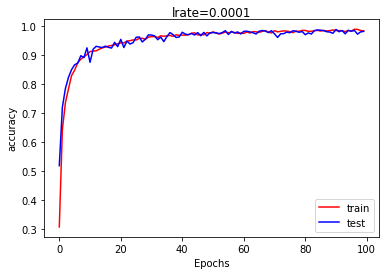

Learning rate :  0.001
Accuracy :  0.9782195091247559
Val Accuracy :  0.9838323593139648
Loss :  0.11911536753177643
Val Loss :  0.14168773591518402 



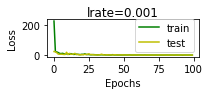

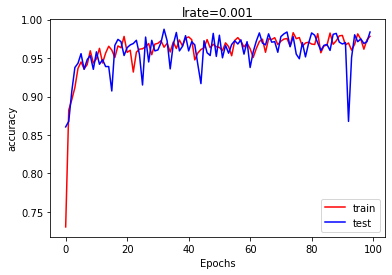

Learning rate :  0.01
Accuracy :  0.20554028451442719
Val Accuracy :  0.23053891956806183
Loss :  1.7648049592971802
Val Loss :  1.7575501203536987 



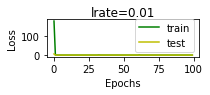

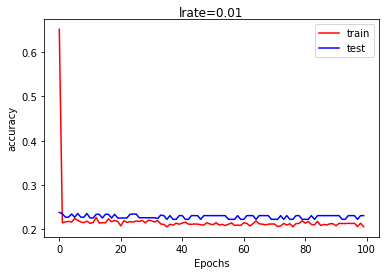

Learning rate :  0.1
Accuracy :  0.21717065572738647
Val Accuracy :  0.22275449335575104
Loss :  1.771344542503357
Val Loss :  3.1499905586242676 



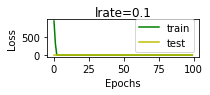

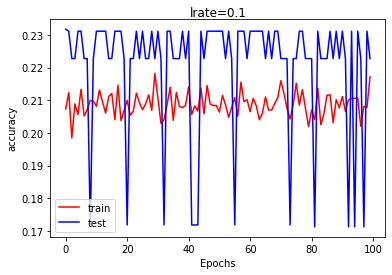

In [114]:
all_lrate = [1E-6, 1E-5, 1E-4, 1E-3, 1E-2, 1E-1]
plt.figure(figsize=(35,25))
for i in range(len(all_lrate)):
  plot_no = 520 + (i+1)
  plt.subplot(plot_no)

  fit_model_acc(X_train, y_train, X_test, y_test, all_lrate[i])


through these graphs we can see that  lrate=0.001  improves our initial model 0.95 to **0.9838** for val accuracy with a val loss very good of **0.14**





We are going to work with the decay this time in order to optimize our model to penalize complexities as we have seen during the course

In [120]:
def fit_model_decay_acc(trainX, trainy, testX, testy, dec):
  
  model = Sequential()
  model.add(Dense(40, activation='relu', input_shape=(X.shape[1],)))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(y.shape[1], activation='softmax'))

  
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,decay=dec),
              metrics=['accuracy'])
  history = model.fit( trainX, trainy, validation_data =( testX , testy ),
                      epochs =100, verbose =0)

  
  print("Accuracy : ", history.history['accuracy'][-1])
  print("Val Accuracy : ", history.history['val_accuracy'][-1])
  print("Loss : ", history.history['loss'][-1])
  print("Val Loss : ", history.history['val_loss'][-1],"\n")

  plt.figure(0)
  plt.plot(history.history['accuracy'], label='train', color='r')
  plt.plot(history.history['val_accuracy'], label='test', color='b')
  plt.title('lrate='+str(dec), pad=-50)
  plt.xlabel("Epochs")
  plt.ylabel("accuracy")
  plt.legend()

  plt.figure(1)

  plt.plot(history.history['loss'], label='train', color='g')
  plt.plot(history.history['val_loss'], label='test', color='y')
  plt.title('dec='+str(dec), pad=-50)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()
  

Accuracy :  0.9721928238868713
Val Accuracy :  0.9526945948600769
Loss :  0.12098747491836548
Val Loss :  0.27388498187065125 



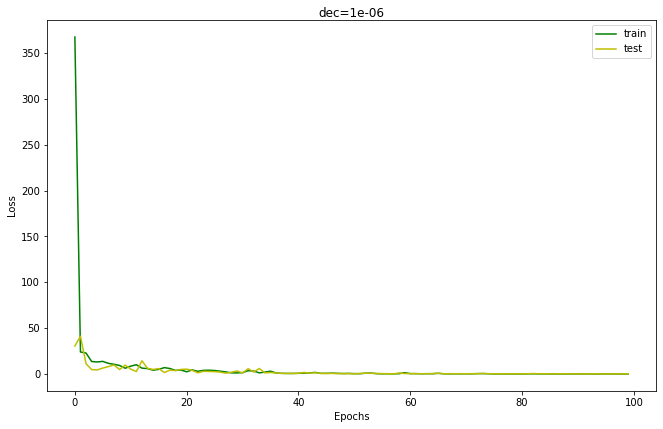

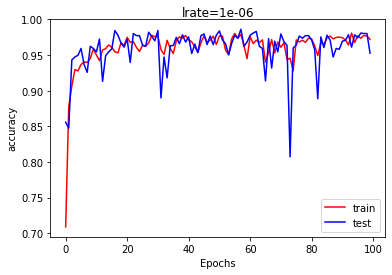

Accuracy :  0.9776908159255981
Val Accuracy :  0.9802395105361938
Loss :  0.11964108794927597
Val Loss :  0.2352546900510788 



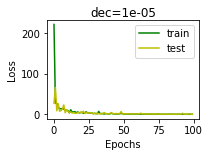

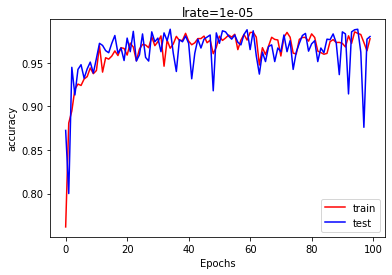

Accuracy :  0.9915415644645691
Val Accuracy :  0.9898203611373901
Loss :  0.43641331791877747
Val Loss :  0.5918311476707458 



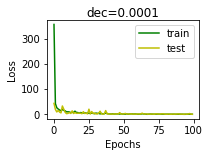

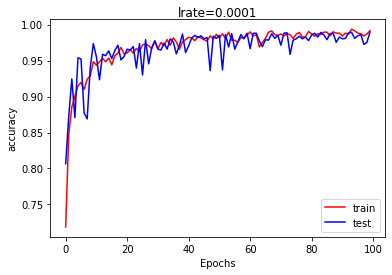

Accuracy :  0.9896383881568909
Val Accuracy :  0.9844311475753784
Loss :  0.6653299331665039
Val Loss :  1.3460795879364014 



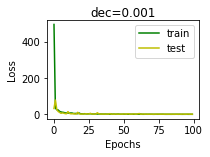

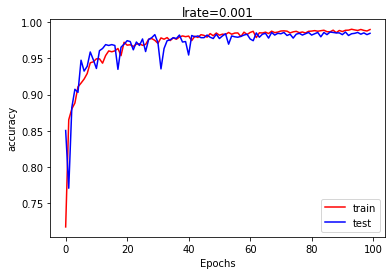

In [121]:
decays = [1E-6, 1E-5, 1E-4, 1E-3]

plt.figure(figsize=(24,15))
for i in range(len(decays)):
  plot_no = 220 + (i+1)
  plt.subplot(plot_no)

  fit_model_decay_acc(X_train, y_train, X_test, y_test, decays[i])

decay=0.0001 seems to improve our model. We have *a* val accuracy equal to 0.9915. But we have to be careful because val_loss increased a little bit (0.59 with lrate+decay and 0.14 juste with lrate)





### Bash normalisation

In [133]:
modelfi = Sequential()
modelfi.add(Dense(40, activation='relu', input_shape=(X.shape[1],)))
modelfi.add(BatchNormalization())
modelfi.add(Dense(40, activation='relu'))
modelfi.add(Dense(y.shape[1], activation='softmax'))

modelfi.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(decay=0.001,learning_rate=0.001), metrics=['acc'])
histfi = modelfi.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_test, y_test), verbose=1)

accfi = histfi.history['val_acc']
val_lossfi = histfi.history['val_loss']

Epoch 1/100
19/19 [==============================] - 1s 16ms/step - loss: 1.9709 - acc: 0.2863 - val_loss: 1.5334 - val_acc: 0.4234
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 1.3594 - acc: 0.5516 - val_loss: 1.2508 - val_acc: 0.4970
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 1.0893 - acc: 0.6453 - val_loss: 1.0626 - val_acc: 0.5982
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.8759 - acc: 0.7686 - val_loss: 0.9076 - val_acc: 0.6665
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6944 - acc: 0.8295 - val_loss: 0.7691 - val_acc: 0.7156
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5494 - acc: 0.8574 - val_loss: 0.6821 - val_acc: 0.7766
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.4345 - acc: 0.9055 - val_loss: 0.5976 - val_acc: 0.7898
Epoch 8/100
19/19 [==============================] - 0s 6ms/step - loss: 0.3703 - 

Great !!!! We have very good metrics val_loss=0.0397, vall_acc=0.9910

In [129]:
modelf = Sequential()
modelf.add(Dense(40, activation='relu', input_shape=(X.shape[1],)))
modelf.add(BatchNormalization())
modelf.add(Dense(40, activation='relu'))
modelf.add(Dense(y.shape[1], activation='softmax'))


modelf.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(decay=0.001,learning_rate=0.001),metrics=['accuracy'])
modelf.fit( X_train, y_train, validation_data =( X_test , y_test ),
                    epochs =100, verbose =0)



# FINAL TEST

In [137]:
df_test=pd.read_csv('/content/phpbL6t4U_train_5.csv',header=None)

In [139]:
X_t = df_test.iloc[:,:-1].values
y_t = df_test.iloc[:,-1].values
y_t = to_categorical(y_t)

In [140]:
modelfi.evaluate(X_t, y_t)

348/348 [==============================] - 1s 3ms/step - loss: 0.0214 - acc: 0.9954


[0.021417716518044472, 0.9954169392585754]

# Conlusion

Finally we get a very good accuracy with a minimum loss_function even with the test. This means that our model does not overfit and it is very important. 
Our loops to find the best parameter values were very efficient